In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import functools


In [31]:
#pre-interpolated data
#(made a copy of this in my directory... filename is probably not what you have Gabs)
all_clean_data = pd.read_csv('all_clean_data-Copy1.csv', parse_dates=['Date'])
all_clean_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ObservationID', 'ObservationTime',
       'Date', 'ObservationTimeApproximate', 'Troop', 'Observer',
       'ObservationType', 'UTMNorthing', 'UTMEasting', 'LocationApproximate',
       'LocationDescription', 'Notes', 'ST', 'STUncertain', 'SM',
       'SMUncertain', 'SF', 'SFUncertain', 'SU', 'SUUncertain', 'SA',
       'SAUncertain', 'SAM', 'SAMUncertain', 'SAF', 'SAFUncertain', 'SAFP',
       'SAFPUncertain', 'SAFL', 'SAFLUncertain', 'SAFEN', 'SAFENUncertain',
       'SAU', 'SAUUncertain', 'SS', 'SSUncertain', 'SSM', 'SSMUncertain',
       'SSF', 'SSFUncertain', 'SSU', 'SSUUncertain', 'SJ', 'SJUncertain',
       'SJM', 'SJMUncertain', 'SJF', 'SJFUncertain', 'SJU', 'SJUUncertain',
       'IT', 'ITUncertain', 'IM', 'IMUncertain', 'IF', 'IFUncertain', 'IU',
       'IUUncertain', 'IA', 'IAUncertain', 'IAM', 'IAMUncertain', 'IAF',
       'IAFUncertain', 'IAFP', 'IAFPUncertain', 'IAFL', 'IAFLUncertain',
       'IAFEN', 'IAFENUncertain', 'IAU', 'IAUUnce

In [32]:
#gabrielle's function to add tdate, tdint and quarter (for pre-interpolated data)
def add_tdate(df):
    ##ADDS TDATE, TDINT, AND QUARTER COLUMNS
    
    
    ##Functionality for full (multitroop) dataframes
    try:
        troop_names = df.loc[~df.Troop.str.contains('/')].Troop.unique()

        df.loc[:,'tdate'] = 0
        df.loc[:,'tdint'] = 0
        
        def add_qtr(x):
            if x.month in [11,12,1]:
                return 1
            elif x.month in [2,3,4]:
                return 2
            elif x.month in [5,6,7]:
                return 3
            else:
                return 4

        df.loc[:,'quarter'] = df.loc[:,'Date'].apply(lambda x: add_qtr(x))
        
        

        for troop in troop_names:

            td = df.loc[df.Troop.str.contains(troop)]
            
            #td.loc[:,'tdint'] = td.Date.apply(lambda x: x.year)
            #td.loc[:,'tdint'] -= td.loc[:,'tdint'].iloc[0]
            
            ###ecount identifies first incomplete year
            ecount = 0
            ###Counter assigns tdint value
            counter = 0

            for year in td.ObsYear.unique():
                ##Finds full single Nov-start year for a troop
                wd = td.loc[(td.Date >= datetime.datetime(int(year),11,1))&(td.Date < datetime.datetime(int(year)+1,11,1))]

                ##Special handling for data that doesn't have a full Nov-start year at beginning of troop data
                if ecount == 0:
                    ed = td.loc[td.Date<datetime.datetime(int(year),11,1)]
                    ed.loc[:,'tdate'] = ed.loc[:,'Date'].apply(lambda x: (int(x.strftime('%j'))-305+365)/365)
                    ed.loc[:,'tdint'] = -1
                    ecount+=1

                try:
                    ##Converts date to a percentage number (0,1) based on Nov-start year Nov 1 = 0 and Oct 31 = 0.99 
                    wd.loc[:,'tdate'] = wd.loc[:,'Date'].apply(lambda x: (int(x.strftime('%j'))-305)/365 if x <= datetime.datetime(int(year),12,31) else (int(x.strftime('%j'))-305+365)/365)
                    wd.loc[:,'tdint'] = counter
                    counter += 1
                    df.update(wd)
                    df.update(ed)
                except:
                    raise Exception('There is an error updating input dataframe in add_tdate function.')
                    
                    
                    
    ##Functionality for single troop dataframes
    ##MUST HAVE DATE COLUMN
    ##For single troop data, will not add tdint based on iterations
        ##Will pull unique years from Date column
    except:
        
        df.loc[:,'tdate'] = 0
        df.loc[:,'tdint'] = 0
        
        def add_qtr(x):
            if x.month in [11,12,1]:
                return 1
            elif x.month in [2,3,4]:
                return 2
            elif x.month in [5,6,7]:
                return 3
            else:
                return 4

        df.loc[:,'quarter'] = df.loc[:,'Date'].apply(lambda x: add_qtr(x))
        
        

        td = df.copy()
        ###ecount identifies first incomplete year
        ecount = 0
        ###Counter assigns tdint value
        counter = 0
    
        for year in td.loc[:,'Date'].apply(lambda x: x.year).unique():
            ##Finds full single Nov-start year for a troop
            wd = td.loc[(td.Date >= datetime.datetime(int(year),11,1))&(td.Date < datetime.datetime(int(year)+1,11,1))]

            ##Special handling for data that doesn't have a full Nov-start year at beginning of troop data
            if ecount == 0:
                ed = td.loc[td.loc[:,'Date']<datetime.datetime(int(year),11,1)]
                ed.loc[:,'tdate'] = ed.loc[:,'Date'].apply(lambda x: (int(x.strftime('%j'))-305+365)/365)
                ed.loc[:,'tdint'] = -1
                ecount+=1

            try:
                ##Converts date to a percentage number (0,1) based on Nov-start year Nov 1 = 0 and Oct 31 = 0.99 
                wd.loc[:,'tdate'] = wd.loc[:,'Date'].apply(lambda x: (int(x.strftime('%j'))-305)/365 if x <= datetime.datetime(int(year),12,31) else (int(x.strftime('%j'))-305+365)/365)
                wd.loc[:,'tdint'] = counter
                counter += 1
                df.update(wd)
                df.update(ed)
            except:
                raise Exception('There is an error updating input dataframe in add_tdate function.')

    
    
    return df

In [33]:
#add tdate, tdint, quarter
all_clean_data_td = add_tdate(all_clean_data)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
all_clean_data_td=all_clean_data_td.loc[(all_clean_data_td.quarter > 2)]

In [45]:
#subset of the data for one troop-year
all_clean_data_sub = all_clean_data_td.loc[(all_clean_data_td.Troop.str.contains('CGL')) & 
               (all_clean_data_td.tdint == 1)]
all_clean_data_sub.head()

,Unnamed: 0,Unnamed: 0.1,ObservationID,ObservationTime,Date,ObservationTimeApproximate,Troop,Observer,ObservationType,UTMNorthing,...,A,S,J,TimeSinceLast,TDiff,ObsYear,ObsMonth,tdate,tdint,quarter
1591,1591.0,9560.0,cgl1005111617,5/11/10 16:17,2010-05-11,0.0,CGL,Mpho Ramotadima,Forage/Rest,8026407.0,...,30.0,11.0,NaN,11 days 00:00:00.000000000,-2.0,2010.0,5.0,0.523288,1.0,3.0
1593,1593.0,9567.0,cgl1005121124,5/12/10 11:24,2010-05-12,0.0,CGL,Mpho Ramotadima,Moving,8026261.0,...,NaN,NaN,NaN,1 days 00:00:00.000000000,-7.0,2010.0,5.0,0.526027,1.0,3.0
1606,1606.0,9589.0,cgl1005171630,5/17/10 16:30,2010-05-17,0.0,CGL,Mpho Ramotadima,Foraging,8026242.0,...,15.0,8.0,NaN,5 days 00:00:00.000000000,-11.0,2010.0,5.0,0.539726,1.0,3.0
1612,1612.0,9599.0,cgl1005181652,5/18/10 16:52,2010-05-18,0.0,CGL,Mpho Ramotadima,Forage/Rest,8026234.0,...,15.0,6.0,NaN,1 days 00:00:00.000000000,-2.0,2010.0,5.0,0.542466,1.0,3.0
1613,1613.0,9603.0,cgl1005190800,5/19/10 8:00,2010-05-19,0.0,CGL,Mpho Ramotadima,Foraging,8026033.0,...,37.0,8.0,NaN,1 days 00:00:00.000000000,24.0,2010.0,5.0,0.545205,1.0,3.0


In [46]:
from scipy.signal import savgol_filter

x = np.array(all_clean_data_sub['tdate'])
y = np.array(all_clean_data_sub['T'])

der1 = savgol_filter(y, polyorder=2, window_length=3, deriv=1)
der1


array([-5.00000000e+00, -9.00000000e+00, -6.50000000e+00,  1.10000000e+01,
       -1.00000000e+00, -7.50000000e+00,  5.50000000e+00, -5.50000000e+00,
       -7.00000000e+00, -8.00000000e+00,  1.10000000e+01,  8.00000000e+00,
        6.50000000e+00,  1.50000000e+01, -8.00000000e+00, -9.00000000e+00,
       -1.50000000e+01, -2.00000000e+00,  1.20000000e+01, -7.00000000e+00,
       -1.25000000e+01, -5.00000000e+00,  1.50000000e+00,  1.00000000e+00,
       -1.50000000e+00, -5.00000000e-01, -1.81458459e-16,  1.05000000e+01,
        1.00000000e+00, -1.10000000e+01, -1.00000000e+00, -1.00000000e+00,
       -5.00000000e+00])

In [47]:
dery2 = savgol_filter(y, polyorder=2, window_length=3, deriv=2)
dery2

array([-4.00000000e+00, -4.00000000e+00,  9.00000000e+00,  2.60000000e+01,
       -5.00000000e+01,  3.70000000e+01, -1.10000000e+01, -1.10000000e+01,
        8.00000000e+00, -1.00000000e+01,  4.80000000e+01, -5.40000000e+01,
        5.10000000e+01, -3.40000000e+01, -1.20000000e+01,  1.00000000e+01,
       -2.20000000e+01,  4.80000000e+01, -2.00000000e+01, -1.80000000e+01,
        7.00000000e+00,  8.00000000e+00,  5.00000000e+00, -6.00000000e+00,
        1.00000000e+00,  1.00000000e+00, -1.77635684e-15,  2.10000000e+01,
       -4.00000000e+01,  1.60000000e+01,  4.00000000e+00, -4.00000000e+00,
       -4.00000000e+00])

In [48]:
dery2 > 0

array([False, False,  True,  True, False,  True, False, False,  True,
       False,  True, False,  True, False, False,  True, False,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
        True, False,  True,  True, False, False])

In [49]:
y[dery2<0]

array([41., 34., 45., 30., 30., 16., 38., 51., 49., 31., 27., 29.,  7.,
        4., 25.,  4.,  1.])

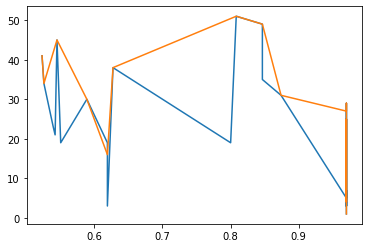

In [51]:
plt.plot(x,y)
plt.plot(x[dery2<0],y[dery2<0])

plt.show()
